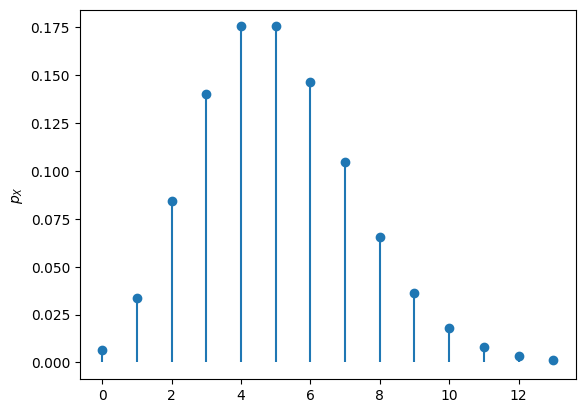

In [10]:
import matplotlib.pyplot as plt
import math
import numpy as np

def poisson_pdf(x, lambda_):
    return math.e**(-lambda_) * lambda_**x / math.factorial(x)

lambda_ = 5
#x = np.arange(0, 15) # per calcolare in modo più intelligente l'upper bound posso vedere il livello del quantile (vedi dopo per esempio)
x = np.arange(0, int(X.ppf(0.999)+1))
y = [poisson_pdf(k, lambda_) for k in x]

plt.vlines(x, 0, y)
plt.plot(x, y, 'o')
plt.ylabel('$p_X$')
plt.show()

In [11]:
1 - sum([poisson_pdf(x, lambda_) for x in range(7)])

0.23781653702706118

In [12]:
import scipy.stats as st

X = st.poisson(lambda_)

In [13]:
1 - X.cdf(6)

0.2378165370270613

In [14]:
cdf  = 0
x = -1
while cdf < 0.8:
    x += 1
    cdf += poisson_pdf(x, lambda_)

print(x)

7


In [15]:
X.cdf(6), X.cdf(7), X.cdf(8) 

(0.7621834629729387, 0.8666283259299925, 0.9319063652781516)

In [16]:
X.ppf(0.8)

7.0

## Esercizio 3

In [17]:
import pandas as pd

acqua = pd.read_csv('data/ComposizioneAcqua.csv')

acqua.head(5)

,NomeSorgente,Oro,DurezzaAcqua
0,Sorgente1,0,21.201381
1,Sorgente1,0,25.294662
2,Sorgente1,4,12.435279
3,Sorgente1,3,16.146828
4,Sorgente1,0,21.091517


In [18]:
!head data/ComposizioneAcqua.csv

In [19]:
len(acqua)

1650

In [20]:
len(acqua) * 5

8250

In [21]:
acqua['NomeSorgente'].nunique()

5

In [22]:
# attributo categorico, mi chiede se è rappresentato in modo uniforme => indice di Gini (eterogeneità)
freq = acqua['NomeSorgente'].value_counts(normalize = True)

In [23]:
def gini(freq):
    ''' Calcola l'indice di Gini in una tabella di frequenzr di un attributo
    
    -freq: serie pandas che contiene le frequenze relative
    
    '''
    return 1 - (freq ** 2).sum()

def normalized_gini(freq):
    n = len(freq)
    return gini(freq) * n / (n - 1)

normalized_gini(acqua['NomeSorgente'].value_counts(normalize=True))

0.980257116620753

In [43]:
oro_freq = acqua['Oro'].value_counts()

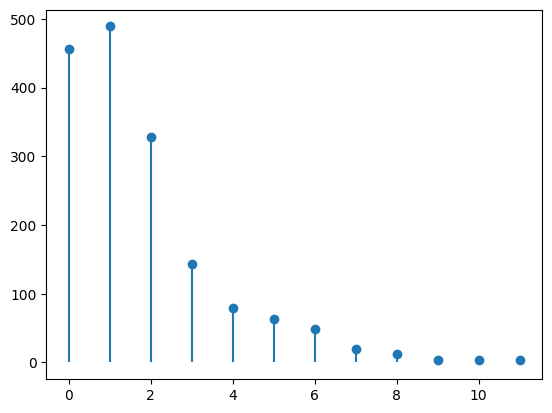

In [46]:
# se distribuzione discreta, grafico bastoncini o a barre
# vedi risultato su L12

plt.vlines(oro_freq.index, 0, oro_freq)
plt.plot(oro_freq.index, oro_freq, 'o')
plt.show()

In [26]:
# è compatibile con un modello di poisson

In [27]:
acqua['Oro'].mean() # la mia stima per il valore atteso

1.7224242424242424

In [47]:
acqua['Oro'].var() 
# prima ho scritto che è compatibile ma qui ho trovato la varianza diversa dal valore atteso... 
# quindi non segue una distribuzione di Poisson(?)

3.4025896319164715

In [29]:
acqua['Oro'].isna().sum() # implicita conversione False = 0, True = 1

0

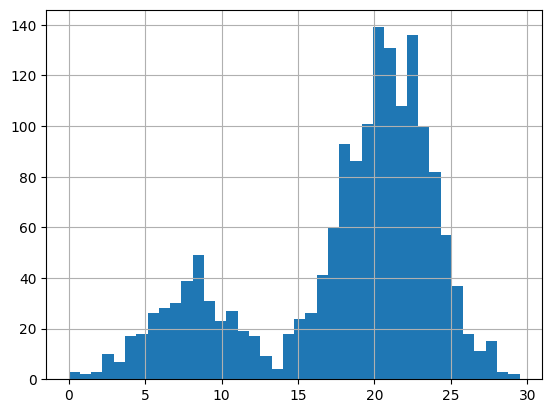

In [30]:
acqua['DurezzaAcqua'].hist(bins=40)
plt.show()

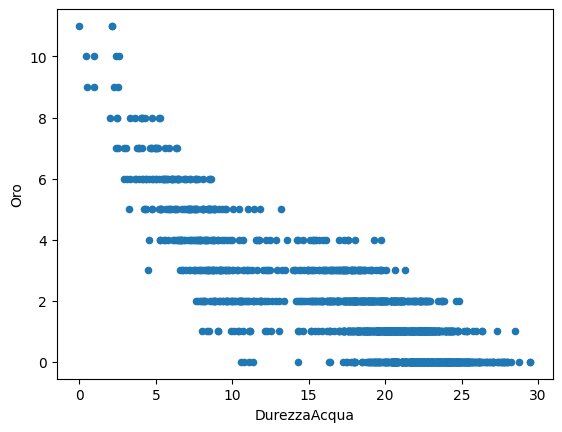

In [31]:
acqua.plot.scatter('DurezzaAcqua', 'Oro')
plt.show()

In [32]:
acqua['Oro'].corr(acqua['DurezzaAcqua'])

-0.842768630507854

In [33]:
acqua.groupby('NomeSorgente').mean()

,Oro,DurezzaAcqua
NomeSorgente,,
Sorgente1,0.970000,21.009675
Sorgente2,1.048000,20.836725
Sorgente3,1.120000,20.696062
Sorgente4,1.068000,20.917371
Sorgente5,4.228571,7.754144


In [34]:
# senza groupby
for n in acqua['NomeSorgente'].unique():
    mean = acqua.loc[acqua['NomeSorgente'] == n, 'DurezzaAcqua'].mean()
    print(f'{n}: {mean:.2f}')

Sorgente1: 21.01
Sorgente2: 20.84
Sorgente3: 20.70
Sorgente4: 20.92
Sorgente5: 7.75


In [35]:
import statsmodels.api as sm

lambda_ = 

sm.qqplot(dist=st.poisson())

SyntaxError: invalid syntax (3801464723.py, line 3)